In [62]:
import collections
import time
import argparse
import sys
import networkx as nx
import json
import numpy as np
import random
from networkx.readwrite import json_graph
import matplotlib.pyplot as plt

In [63]:
def load_json(file_path):
    try:
        f = open(file_path, 'r', encoding="utf8")
    except:
        print("Could not open file: " + file_path)
        sys.exit(-1)

    try:
        json_data =json.load(f)
    except:
        print("Could not parse JSON!")
        sys.exit(-1)

    for item in json_data['edges']:
        if item['capacity']:
            item['capacity'] = int(item['capacity'])

    return json_data


In [64]:
def remove_single_components(G):
    list_conn = list(nx.connected_components(G))
    count = 0
    for entry in list_conn:
        if entry != max(list_conn, key=len):
            for setentry in entry:
                G.remove_node(setentry)
                count += 1


In [65]:
def reachable_nodes(G):
    copy_G = G.copy()
    remove_single_components(copy_G)
    ccs = list(nx.connected_components(copy_G))
    assert(len(ccs) == 1)
    return len(ccs[0])


In [66]:
def average_max_flow(G, num_samples, round):
    copy_G = G.copy()
    nodes = list(copy_G.nodes())
    max_flow_value = 0
    random.seed(round)
    for _ in range(num_samples):
        s = random.choice(nodes)
        t = random.choice(nodes)
        while (s == t):
            t = random.choice(nodes)
        max_flow_value = max_flow_value + nx.maximum_flow_value(copy_G, s, t,capacity='capacity')
    random.seed(time.time())
    return max_flow_value/num_samples


In [67]:
def load_graph(json_data):
    G = json_graph.node_link_graph(json_data, False, False, {'name':'pub_key', 'source':'node1_pub', 'target':'node2_pub', 'key':'channel_id', 'link':'edges'})
    return G

In [68]:
parser = argparse.ArgumentParser(description='Lightning Network analysis')
parser.add_argument('-f', '--file', type=str, help='the LN graph in JSON format', default="lngraph.json")

_StoreAction(option_strings=['-f', '--file'], dest='file', nargs=None, const=None, default='lngraph.json', type=<class 'str'>, choices=None, help='the LN graph in JSON format', metavar=None)

In [69]:
args = parser.parse_args()
json_data = load_json("lngraph.json")
G = load_graph(json_data)

In [70]:
num_edges = nx.number_of_edges(G)
num_nodes = nx.number_of_nodes(G)
print("Number of Edges : ")
print(num_edges)
print("Number of Nodes : ")
print(num_nodes)

Number of Edges : 
6203
Number of Nodes : 
1457


In [71]:
#Now to recognize the top 200 highest degree nodes.
sorteddegree = sorted(G.degree, key=lambda x: x[1], reverse = True)
sorteddegree = sorteddegree[0:200]

In [72]:
Atemp = G.copy()
sorteddegree

[('02cdf83ef8e45908b1092125d25c68dcec7751ca8d39f557775cd842e5bc127469', 395),
 ('02ad6fb8d693dc1e4569bcedefadf5f72a931ae027dc0f0c544b34c1c6f3b9a02b', 325),
 ('02529db69fd2ebd3126fb66fafa234fc3544477a23d509fe93ed229bb0e92e4fb8', 313),
 ('03cb7983dc247f9f81a0fa2dfa3ce1c255365f7279c8dd143e086ca333df10e278', 225),
 ('03bb88ccc444534da7b5b64b4f7b15e1eccb18e102db0e400d4b9cfe93763aa26d', 219),
 ('032b2b3f4abda9677bb9563e226c068d3a2456fb8b036635a81c9bcaa1671d1ada', 215),
 ('03864ef025fde8fb587d989186ce6a4a186895ee44a926bfc370e2c366597a3f8f', 183),
 ('026bce917a5854f3c5140cc69c977d19a6d656554120b6dedf045b246941b858c5', 159),
 ('0279c22ed7a068d10dc1a38ae66d2d6461e269226c60258c021b1ddcdfe4b00bc4', 159),
 ('0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266', 155),
 ('0327049d8d63f0c40193cdf3afc61817c8647808a4e482de0716fcef74e6d92ebf', 130),
 ('0394396e6e8cf8d9f91de4269dfd2e8416b93b91cae6139057c7283b463e4bfa31', 123),
 ('024a2e265cd66066b78a788ae615acdc84b5b0dec9efac36d7ac87513015e

In [73]:
degreeDec = np.empty([1,200])

In [74]:
#Removing Nodes one by one according to decreasing degree
#Storing new values of remaining edges
for i in range(200):
    Atemp.remove_node(sorteddegree[i][0])
    degreeDec[0][i] = Atemp.number_of_edges()

In [75]:
Atemp.number_of_edges() #ATEMP FOR NODE DEGREE

422

In [76]:
Atemp.number_of_nodes()

1257

In [77]:
G.number_of_edges()

6203

In [78]:
G.number_of_nodes()

1457

Text(0.5, 0, 'Number of Nodes Removed')

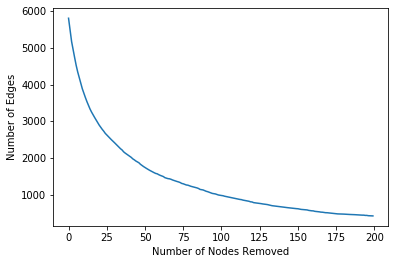

In [79]:
plt.plot(degreeDec[0])
plt.ylabel('Number of Edges')
plt.xlabel('Number of Nodes Removed')

In [80]:
sbetween = nx.betweenness_centrality(G)

In [81]:
sbetween

{'02004c625d622245606a1ea2c1c69cfb4516b703b47945a3647713c05fe4aaeb1c': 0.00025046119494874085,
 '02005dcac896582db30f259c17bba1849a9e1127f60d120ec7db69c17ce64d749d': 3.179598525648519e-05,
 '0200a17d9e80281ce0b7f1b58edc93d6a21242c290fd032b06712f01a67219a29a': 0.0,
 '0201cc5c237368165ca4221526596205b4d747602c837e327621f19b7b415aa1f6': 0.00034305419585292424,
 '0201d3fb63901ffaaa6ce535c9227fb3dc4646b6276096dd10c8a12e178ac9886f': 7.072889539520865e-06,
 '020211194bc7e5830673f87346e77f125c9eca59b308c041f9a54a62be8374f344': 1.413554479903938e-06,
 '0202b1f1a4a74876e6c03bc135541ab89ad555bff38cc8984e6ba8cab1a16db4ed': 3.384263490752422e-06,
 '0202e47a66e07ebd69d751975edc9508e39500c0bcb91767da96dbc634f7c1e801': 1.086091136667328e-05,
 '020384685e321a44cac1a1683a5c660c8eb62b840b174de8427d2489b5e64e13fa': 0.0,
 '02040d058e0504c7d4b1fe2fef510396f33bdabfe36450bbb6c7ea0d567d53a15f': 0.0001825923522084698,
 '02045ddf470879ca0f142a009453c8d95fce5bddbce898dc6d436f558815c38872': 0.0,
 '02047c886946e215

In [82]:
sbetweensorted = {k: v for k, v in reversed(sorted(sbetween.items(), key=lambda item: item[1]))}
sbetweensorted

{'02cdf83ef8e45908b1092125d25c68dcec7751ca8d39f557775cd842e5bc127469': 0.18731041611617108,
 '02ad6fb8d693dc1e4569bcedefadf5f72a931ae027dc0f0c544b34c1c6f3b9a02b': 0.15023842211266308,
 '02529db69fd2ebd3126fb66fafa234fc3544477a23d509fe93ed229bb0e92e4fb8': 0.12151730304799187,
 '03864ef025fde8fb587d989186ce6a4a186895ee44a926bfc370e2c366597a3f8f': 0.09130736200779456,
 '032b2b3f4abda9677bb9563e226c068d3a2456fb8b036635a81c9bcaa1671d1ada': 0.07331593837125251,
 '03cb7983dc247f9f81a0fa2dfa3ce1c255365f7279c8dd143e086ca333df10e278': 0.0654044515650861,
 '03bb88ccc444534da7b5b64b4f7b15e1eccb18e102db0e400d4b9cfe93763aa26d': 0.061194330522336526,
 '0327049d8d63f0c40193cdf3afc61817c8647808a4e482de0716fcef74e6d92ebf': 0.05687032969222,
 '0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266': 0.04724421249696203,
 '026bce917a5854f3c5140cc69c977d19a6d656554120b6dedf045b246941b858c5': 0.044688586918335015,
 '0279c22ed7a068d10dc1a38ae66d2d6461e269226c60258c021b1ddcdfe4b00bc4': 0.042579417

In [83]:
x = list(sbetweensorted.keys())
x

['02cdf83ef8e45908b1092125d25c68dcec7751ca8d39f557775cd842e5bc127469',
 '02ad6fb8d693dc1e4569bcedefadf5f72a931ae027dc0f0c544b34c1c6f3b9a02b',
 '02529db69fd2ebd3126fb66fafa234fc3544477a23d509fe93ed229bb0e92e4fb8',
 '03864ef025fde8fb587d989186ce6a4a186895ee44a926bfc370e2c366597a3f8f',
 '032b2b3f4abda9677bb9563e226c068d3a2456fb8b036635a81c9bcaa1671d1ada',
 '03cb7983dc247f9f81a0fa2dfa3ce1c255365f7279c8dd143e086ca333df10e278',
 '03bb88ccc444534da7b5b64b4f7b15e1eccb18e102db0e400d4b9cfe93763aa26d',
 '0327049d8d63f0c40193cdf3afc61817c8647808a4e482de0716fcef74e6d92ebf',
 '0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266',
 '026bce917a5854f3c5140cc69c977d19a6d656554120b6dedf045b246941b858c5',
 '0279c22ed7a068d10dc1a38ae66d2d6461e269226c60258c021b1ddcdfe4b00bc4',
 '0347ffcb271ef54fa6103fc6392370ce398d1bc98460829f7046cf64026253a68e',
 '02a45def9ae014fdd2603dd7033d157faa3a55a72b06a63ae22ef46d9fafdc6e8d',
 '0394396e6e8cf8d9f91de4269dfd2e8416b93b91cae6139057c7283b463e4bfa31',
 '0307

In [84]:
degdec = np.empty([1,200])
Btemp = G.copy() #BTEMP FOR BETWEENNESS CENTRALITY
Btemp.number_of_edges()
x=x[0:200]
len(x)

200

In [85]:
p = 0
for i in x:
    Btemp.remove_node(i)
    degdec[0][p] = Btemp.number_of_edges()
    p = p + 1
p = 0


Text(0.5, 0, 'No of Nodes Removed')

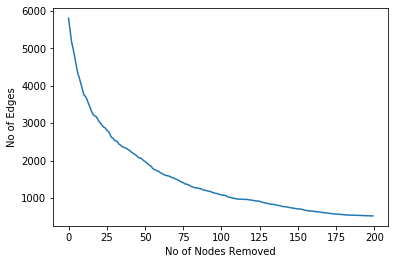

In [86]:
plt.plot(degdec[0])
plt.ylabel("No of Edges")
plt.xlabel("No of Nodes Removed")

In [87]:
#Now to identify the top 100 highest eigenvector centrality nodes
ecentral = nx.eigenvector_centrality(G)

In [88]:
ecentral

{'02004c625d622245606a1ea2c1c69cfb4516b703b47945a3647713c05fe4aaeb1c': 0.006049667395781829,
 '02005dcac896582db30f259c17bba1849a9e1127f60d120ec7db69c17ce64d749d': 0.00836048313088472,
 '0200a17d9e80281ce0b7f1b58edc93d6a21242c290fd032b06712f01a67219a29a': 0.005227577464882954,
 '0201cc5c237368165ca4221526596205b4d747602c837e327621f19b7b415aa1f6': 0.032259358947855574,
 '0201d3fb63901ffaaa6ce535c9227fb3dc4646b6276096dd10c8a12e178ac9886f': 0.013337385908979382,
 '020211194bc7e5830673f87346e77f125c9eca59b308c041f9a54a62be8374f344': 0.0021450484485274267,
 '0202b1f1a4a74876e6c03bc135541ab89ad555bff38cc8984e6ba8cab1a16db4ed': 0.009310932602083929,
 '0202e47a66e07ebd69d751975edc9508e39500c0bcb91767da96dbc634f7c1e801': 0.009629571118472643,
 '020384685e321a44cac1a1683a5c660c8eb62b840b174de8427d2489b5e64e13fa': 0.008859974948655808,
 '02040d058e0504c7d4b1fe2fef510396f33bdabfe36450bbb6c7ea0d567d53a15f': 0.014326068002005182,
 '02045ddf470879ca0f142a009453c8d95fce5bddbce898dc6d436f558815c38872':

In [89]:
ecentralsorted = {k: v for k, v in reversed(sorted(ecentral.items(), key=lambda item: item[1]))}
ecentralsorted

{'02cdf83ef8e45908b1092125d25c68dcec7751ca8d39f557775cd842e5bc127469': 0.2611236764255528,
 '02529db69fd2ebd3126fb66fafa234fc3544477a23d509fe93ed229bb0e92e4fb8': 0.23282778726821585,
 '03bb88ccc444534da7b5b64b4f7b15e1eccb18e102db0e400d4b9cfe93763aa26d': 0.2127490173894599,
 '02ad6fb8d693dc1e4569bcedefadf5f72a931ae027dc0f0c544b34c1c6f3b9a02b': 0.20982641983802608,
 '03cb7983dc247f9f81a0fa2dfa3ce1c255365f7279c8dd143e086ca333df10e278': 0.18186745267044246,
 '032b2b3f4abda9677bb9563e226c068d3a2456fb8b036635a81c9bcaa1671d1ada': 0.1794098061098456,
 '026bce917a5854f3c5140cc69c977d19a6d656554120b6dedf045b246941b858c5': 0.14996958429840782,
 '0279c22ed7a068d10dc1a38ae66d2d6461e269226c60258c021b1ddcdfe4b00bc4': 0.14675642304530084,
 '03f9ceb115a119594b4688ceed35feb80f33a3dd0f5cf688a7493c1a7217633931': 0.14274473572521948,
 '0307243743f60637f090347f9f2c1c98017071fd8f6afd8d6f6f6a64c7393a858a': 0.13486442470024926,
 '0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266': 0.1283528042

In [90]:
x = list(ecentralsorted.keys())
x

['02cdf83ef8e45908b1092125d25c68dcec7751ca8d39f557775cd842e5bc127469',
 '02529db69fd2ebd3126fb66fafa234fc3544477a23d509fe93ed229bb0e92e4fb8',
 '03bb88ccc444534da7b5b64b4f7b15e1eccb18e102db0e400d4b9cfe93763aa26d',
 '02ad6fb8d693dc1e4569bcedefadf5f72a931ae027dc0f0c544b34c1c6f3b9a02b',
 '03cb7983dc247f9f81a0fa2dfa3ce1c255365f7279c8dd143e086ca333df10e278',
 '032b2b3f4abda9677bb9563e226c068d3a2456fb8b036635a81c9bcaa1671d1ada',
 '026bce917a5854f3c5140cc69c977d19a6d656554120b6dedf045b246941b858c5',
 '0279c22ed7a068d10dc1a38ae66d2d6461e269226c60258c021b1ddcdfe4b00bc4',
 '03f9ceb115a119594b4688ceed35feb80f33a3dd0f5cf688a7493c1a7217633931',
 '0307243743f60637f090347f9f2c1c98017071fd8f6afd8d6f6f6a64c7393a858a',
 '0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266',
 '0394396e6e8cf8d9f91de4269dfd2e8416b93b91cae6139057c7283b463e4bfa31',
 '026106b6f7287fa361332864f2ab8d24c8227202e071848959b9c4e5eca1094374',
 '03864ef025fde8fb587d989186ce6a4a186895ee44a926bfc370e2c366597a3f8f',
 '02a4

In [91]:
edec = np.empty([1,200])
Ctemp = G.copy()
Ctemp.number_of_edges()
x=x[0:200]
len(x)

200

In [92]:
p = 0
for i in x:
    Ctemp.remove_node(i) #CTEMP FOR EIGENVECTOR CENTRALITY
    edec[0][p] = Ctemp.number_of_edges()
    p = p + 1
p = 0
edec[0]

array([5808., 5496., 5279., 4955., 4732., 4522., 4366., 4212., 4110.,
       4007., 3860., 3744., 3666., 3491., 3417., 3298., 3215., 3153.,
       3082., 3022., 2918., 2874., 2811., 2760., 2720., 2677., 2635.,
       2601., 2573., 2534., 2508., 2476., 2466., 2434., 2369., 2336.,
       2319., 2304., 2277., 2237., 2204., 2178., 2151., 2110., 2085.,
       2065., 2021., 2007., 1993., 1965., 1948., 1920., 1912., 1892.,
       1865., 1844., 1833., 1806., 1789., 1757., 1735., 1706., 1695.,
       1661., 1648., 1640., 1636., 1617., 1603., 1592., 1576., 1569.,
       1560., 1530., 1523., 1511., 1495., 1480., 1462., 1453., 1449.,
       1441., 1432., 1428., 1376., 1372., 1366., 1362., 1348., 1342.,
       1330., 1325., 1319., 1311., 1303., 1298., 1283., 1279., 1273.,
       1270., 1265., 1256., 1248., 1231., 1226., 1214., 1206., 1196.,
       1187., 1182., 1176., 1172., 1170., 1167., 1156., 1152., 1152.,
       1150., 1149., 1149., 1136., 1130., 1126., 1097., 1095., 1091.,
       1084., 1081.,

Text(0.5, 0, 'No of Nodes Removed')

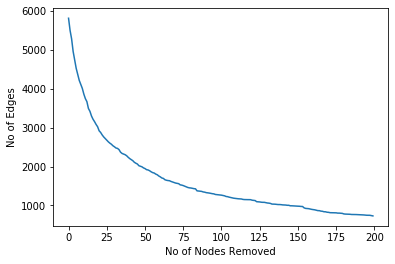

In [93]:
plt.plot(edec[0])
plt.ylabel("No of Edges")
plt.xlabel("No of Nodes Removed")

In [94]:
#LOOKING AT CHANGES

In [95]:
#REACHABLE NODES
reachable_nodes(G)

1446

In [96]:
reachable_nodes(Atemp)

66

In [97]:
reachable_nodes(Btemp)

369

In [98]:
reachable_nodes(Ctemp)

507

In [99]:
#AVERAGE MAXIMUM FLOW
average_max_flow(G,1000,10)

1244384.381

In [100]:
average_max_flow(Atemp,500,10)

80.0

In [101]:
average_max_flow(Btemp,500,10)

22480.042

In [102]:
average_max_flow(Ctemp,500,10)

7039.108